## Objective:

To learn and practice PCA and steps in PCA with small example.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
ratings = pd.read_csv("./Ratings.csv")

In [35]:
ratings.shape

(7, 5)

In [36]:
ratings

,B1,B2,B3,B4,B5
0,1,0,4,0,3
1,2,3,4,3,2
2,3,3,2,4,2
3,4,4,3,5,4
4,5,1,4,2,2
5,4,2,4,3,4
6,4,3,1,5,5


In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(random_state=40)

In [39]:
# Perform PCA
pca.fit(ratings)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=40,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
# Get the PCs
pca.components_

array([[-0.31118649, -0.48101502,  0.35622281, -0.69199674, -0.25696953],
       [ 0.90672615, -0.31113879,  0.25507174, -0.09225738,  0.08641369],
       [-0.12857449, -0.38163517, -0.34923551, -0.16484744,  0.82986931],
       [ 0.1452065 , -0.34290409, -0.79235694, -0.05662208, -0.47989194],
       [-0.20831306, -0.63920934,  0.24134777,  0.69444104, -0.08671783]])

In [41]:
# get the variance explained by each of the PC
pca.explained_variance_ratio_

array([6.51886873e-01, 1.52836342e-01, 1.30717403e-01, 6.43810220e-02,
       1.78359842e-04])

## Scree plot

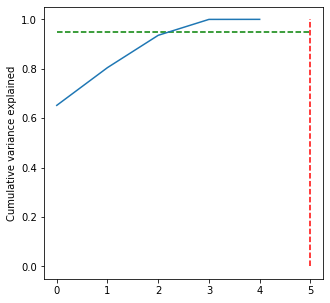

In [42]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[5,5])
plt.vlines(x=5, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=5, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

It looks like 3 PCs explains about 90% of variance

In [43]:
pca_final = PCA(n_components=3)

In [44]:
# project the data to the new Principal Components
df_pca = pca_final.fit_transform(ratings)

In [45]:
df_pca.shape

(7, 3)

In [46]:
corrmat = np.corrcoef(df_pca.transpose())
corrmat.shape

(3, 3)

In [47]:
corrmat

array([[ 1.00000000e+00, -1.24639213e-16,  1.10835052e-16],
       [-1.24639213e-16,  1.00000000e+00, -1.86833216e-16],
       [ 1.10835052e-16, -1.86833216e-16,  1.00000000e+00]])

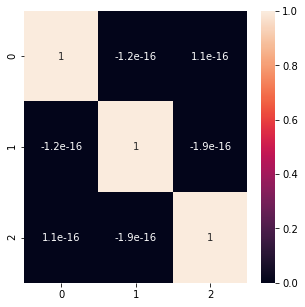

In [48]:
plt.figure(figsize=[5,5])
sns.heatmap(corrmat, annot=True)
plt.show()

### Making it a little more unsupervised 


In [49]:
# It will automatically choose those PCs which will explain 90% variance
pca2 = PCA(0.90)

# we dont need to draw and analyze scree plot here, hence making PCA more Unsupervised

In [50]:
df_pca2 = pca2.fit_transform(ratings)

In [51]:
df_pca2.shape

(7, 3)

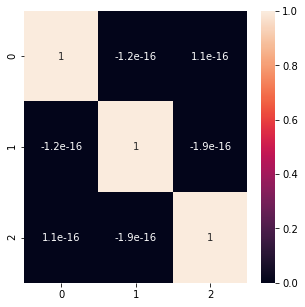

In [52]:
corrmat2 = np.corrcoef(df_pca2.transpose())

plt.figure(figsize=[5,5])
sns.heatmap(corrmat2, annot=True)
plt.show()